# Architecture One

Which dataset you choose? DSADS or TwoPatterns
NoneTwoPatterns
Size of Training data (1000, 129)
Size of Testing data (4000, 129)
Number of classes present 4


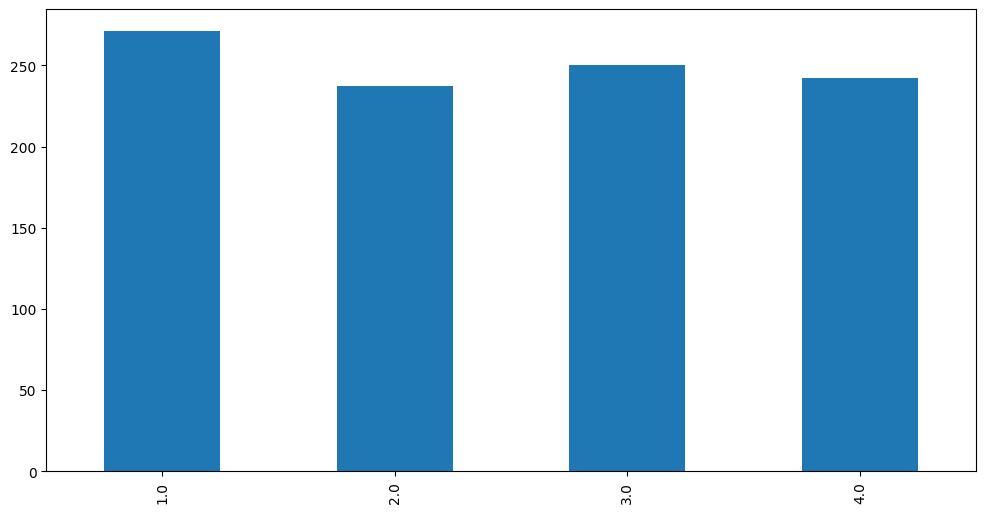

Train Features (900, 128)
Train Label (900, 4)
Validation Features (100, 128)
Validation Labels (100, 4)
Test Features (4000, 128)
Test Labels (4000, 4)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch
from torch.utils.data import DataLoader
import torch
from torch.utils.data import DataLoader
Dataset=input(print('Which dataset you choose? DSADS or TwoPatterns'))

if(Dataset=='DSADS'):
    #DSADS Data Proprocessing
    Data=pd.read_csv('/content/drive/MyDrive/Work with BAVA/Datasets/dsads_preprocessed_data - dsads_preprocessed_data.csv')
    #Dropping both Seconds and Subject Columns
    Data=Data.drop(['Seconds','Subject'],axis=1)
    print('Size of data',Data.shape)

    #These are all the various job categories present in the dataset
    categories=np.sort(Data['Activities'].unique())
    number_of_classes=len(categories)
    print('Number of classes present',number_of_classes)

    #Printing the data after preprocessing textual values and encoding the labels

    label=Data['Activities']
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(label)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    label= onehot_encoder.fit_transform(integer_encoded)

    #Distribution of different categories present in the dataset
    Data['Activities'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
    plt.show()
    Data=Data.drop('Activities',axis=1)

    #Splitting the training and test dataset shape
    X_train,X_test,Y_train,Y_test = train_test_split(Data,label,random_state=421212, test_size=0.1,shuffle=True)
    X_train,X_Val,Y_train,Y_Val = train_test_split(X_train,Y_train,random_state=421212, test_size=0.1,shuffle=True)

    print('Train Features',X_train.shape)
    print('Train Label',Y_train.shape)
    print('Validation Features',X_Val.shape)
    print('Validation Labels',Y_Val.shape)
    print('Test Features',X_test.shape)
    print('Test Labels',Y_test.shape)

else:
    ## Two Patterns Data Preprocessing
    TP_Train_Data=pd.read_csv('/content/drive/MyDrive/Work with BAVA/Datasets/Two_Patterns_Data/Two_Patterns_train.csv',header=None)
    TP_Test_Data=pd.read_csv('/content/drive/MyDrive/Work with BAVA/Datasets/Two_Patterns_Data/Two_Patterns_test.csv',header=None)
    print('Size of Training data',TP_Train_Data.shape)
    print('Size of Testing data',TP_Test_Data.shape)

    # Initialize an empty list
    feature_list = []

    # Iterate through the range and append strings to the list
    for i in range(1, 129):
        feature_string = f"Feature{i}"
        feature_list.append(feature_string)

    # Print the resulting list
    feature_list.insert(0, 'Label')

    TP_Train_Data.columns=feature_list
    TP_Test_Data.columns=feature_list

    # #These are all the various job categories present in the dataset
    categories=np.sort(TP_Train_Data['Label'].unique())
    number_of_classes=len(categories)
    print('Number of classes present',number_of_classes)
    TP_Train_Data.head()

    #Printing the data after preprocessing textual values and encoding the labels

    label=TP_Train_Data['Label']
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(label)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    TP_Train_label= onehot_encoder.fit_transform(integer_encoded)

    X_test=TP_Test_Data.drop('Label',axis=1)
    Y_test=TP_Test_Data['Label']
    integer_encoded = label_encoder.fit_transform(Y_test)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    Y_test= onehot_encoder.fit_transform(integer_encoded)

    #Distribution of different categories present in the dataset
    TP_Train_Data['Label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
    plt.show()

    TP_Train_Data=TP_Train_Data.drop('Label',axis=1)

    X_train,X_Val,Y_train,Y_Val = train_test_split(TP_Train_Data,TP_Train_label,random_state=421212, test_size=0.1,shuffle=True)
    print('Train Features',X_train.shape)
    print('Train Label',Y_train.shape)
    print('Validation Features',X_Val.shape)
    print('Validation Labels',Y_Val.shape)
    print('Test Features',X_test.shape)
    print('Test Labels',Y_test.shape)

In [ ]:
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)
X_Val=np.asarray(X_Val)
Y_Val=np.asarray(Y_Val)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_Val = torch.tensor(X_Val, dtype=torch.float32)
Y_Val = torch.tensor(Y_Val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

Train_loader = DataLoader(list(zip(X_train, Y_train)), shuffle=True, batch_size=batch_size)
Val_loader = DataLoader(list(zip(X_Val, Y_Val)), shuffle=False, batch_size=batch_size)
Test_loader = DataLoader(list(zip(X_test, Y_test)), shuffle=False, batch_size=test_batch_size)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

Training_loss=[]
Validation_loss=[]
Testing_loss=[]
Training_accuracy=[]
Validation_accuracy=[]
Testing_accuracy=[]
model_states_dict = {}

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=features, hidden_size=hidden_size, num_layers=2)
        self.linear = nn.Linear(hidden_size, number_of_classes)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


# Function to train the model
def train(model, criterion, optimizer, Train_loader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    best_accuracy= 0.0
    for inputs, labels in Train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(Train_loader)
    epoch_accuracy = 100 * correct / total
    Training_loss.append(epoch_loss)
    Training_accuracy.append(epoch_accuracy)
    return epoch_loss, epoch_accuracy

# Function to validate the model
def validate(model, criterion, Test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in Test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            _, labels = torch.max(labels, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(Test_loader)
    epoch_accuracy = 100 * correct / total
    model_states_dict[epoch_accuracy] = model.state_dict()
    Validation_loss.append(epoch_loss)
    Validation_accuracy.append(epoch_accuracy)
    return epoch_loss, epoch_accuracy

# Define hyperparameters
input_size = X_train.shape[1]                                                   # Enter the input size (number of features)
number_of_classes = number_of_classes                                           # Number of classes in the dataset
lr = 0.0001                                                                      # Learning rate
num_epochs = 100
features = X_train.shape[1]
batch_size = 4
test_batch_size = 1
hidden_size=1000

# Initialize the model, loss function, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, criterion, optimizer, Train_loader)
    val_loss, val_accuracy = validate(model, criterion, Val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

highest_accuracy = max(model_states_dict.keys())
# Save the model state corresponding to the highest accuracy to a file
best_model_state = model_states_dict[highest_accuracy]
torch.save(best_model_state, '/content/drive/MyDrive/Work with BAVA/Models/Best model with accuracy ' + str(highest_accuracy) + '.pth')
print('Saved the model with '+ str(highest_accuracy))


running_loss = 0.0
correct = 0
total = 0
model=Model()
# Load the model state dictionary
model_state_dict = torch.load('/content/drive/MyDrive/Work with BAVA/Models/Best model with accuracy ' + str(highest_accuracy) + '.pth')
model.load_state_dict(model_state_dict)
print('Testing the Model')
with torch.no_grad():
  for inputs, labels in Test_loader:
    model.eval()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    _, labels = torch.max(labels, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  test_loss = running_loss / len(Test_loader)
  test_accuracy = 100 * correct / total
  model_states_dict[test_accuracy] = model.state_dict()
  Testing_loss.append(test_loss)
  Testing_accuracy.append(test_accuracy)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/100] - Train Loss: 1.3831, Train Accuracy: 27.78%, Val Loss: 1.3758, Val Accuracy: 30.00%
Epoch [2/100] - Train Loss: 1.3696, Train Accuracy: 32.89%, Val Loss: 1.3615, Val Accuracy: 34.00%
Epoch [3/100] - Train Loss: 1.3488, Train Accuracy: 37.00%, Val Loss: 1.3369, Val Accuracy: 37.00%
Epoch [4/100] - Train Loss: 1.3145, Train Accuracy: 41.00%, Val Loss: 1.2965, Val Accuracy: 39.00%
Epoch [5/100] - Train Loss: 1.2784, Train Accuracy: 41.89%, Val Loss: 1.2330, Val Accuracy: 41.00%
Epoch [6/100] - Train Loss: 1.1990, Train Accuracy: 45.33%, Val Loss: 1.1161, Val Accuracy: 48.00%
Epoch [7/100] - Train Loss: 1.1045, Train Accuracy: 51.22%, Val Loss: 1.0121, Val Accuracy: 55.00%
Epoch [8/100] - Train Loss: 0.9686, Train Accuracy: 56.67%, Val Loss: 0.9136, Val Accuracy: 61.00%
Epoch [9/100] - Train Loss: 0.8697, Train Accuracy: 59.44%, Val Loss: 0.8846, Val Accuracy: 53.00%
Epoch [10/100] - Train Loss: 0.8296, Train Accuracy: 65.56%, Val Loss: 0.7911, Val Accuracy: 65.00%
Epoch [11

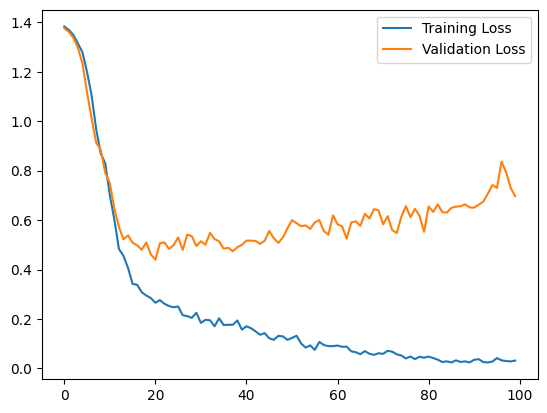

In [ ]:
fig, ax = plt.subplots()
line_up, = ax.plot(Training_loss, label='Training Loss')
line_down, = ax.plot(Validation_loss, label='Validation Loss')
ax.legend(handles=[line_up, line_down])

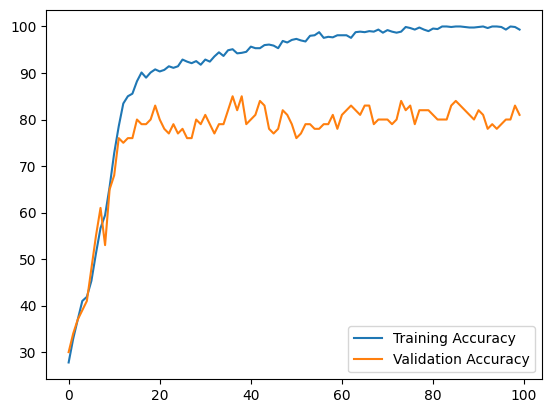

In [ ]:
fig, ax = plt.subplots()
line_side, = ax.plot(Training_accuracy, label='Training Accuracy')
line_sides, = ax.plot(Validation_accuracy, label='Validation Accuracy')
ax.legend(handles=[line_side, line_sides])